# Part3 - Training Machine Learning Model for Thera Bank Loan Modelling

1. This part of the activity is to train and test the classification machine learning algorith of choice to suite the problem.

2. In this problem of identifying a potential customer, the algorithm needs to be more sensitive to false negatives than false positives as the cost of the missed opportunity could be higher as we may loose a potential customer. 

3. Recall could be understood as the ability to correctly identify true positives from actual positives from a  or mathematically its expressed as  $$Recall = \frac{TP}{TP+FN}$$. TP= True Positives, FN=False Negatives.

4. Here we will use PyCaret, which is a low-code machine learning in Python.
5. The Notebook contains the following parts:
    1. **Importing Libraries.**
    2. **Importing data from the CSV file.**
    3. **Data Cleansing.**
    4. **Split dfata into train/test and unseen data.**
    5. **Model creation adn validation.**
    6. **Model Comparison and Conclusion.**


## (1) Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import datetime
from pycaret.classification import *
from pycaret.utils import check_metric
import ipywidgets as widgets

## (2) Import the data and describe it

In [2]:
df= pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## (3) Data Cleansing

In [5]:
# Experience Column
exp_corr_mean = round(df[df['Experience'] > 0]['Experience'].mean())
df['Experience']=df['Experience'].apply(lambda x : exp_corr_mean if(x < 0) else x )
df[df['Experience'] <0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [6]:
# ZIP Code
df['ZIP Code'] = df['ZIP Code'].apply(lambda x : int(x/100) if len(str(x)) < 5 else int(x/1000))
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1


In [7]:
try:
    df.drop('ID',axis=1,inplace=True)
except:
    pass
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


## (4) Split data into Train/test and Unseen data

In [8]:
# Pick a random sample of 5% which will be used as unseen data later for validation.
data = df.sample(frac=0.95, random_state=111) 
data_unseen = df.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (4750, 13)
Unseen Data For Predictions (250, 13)


## (5) Model Creation and Validation

### Setup the PyCaret Environment

In [9]:
# Initialise the training environment.
exp01 = setup(data = data, 
              target = 'Personal Loan', # Set the target variable as 'Personal Loan'
              session_id=123,
              normalize = True,  # Normalize/scale the data using 'zscore'
              transformation = True,  # Transform the data. Make the data appear more Gaussian like
#               ignore_low_variance = True,
              remove_multicollinearity = True,  # Remove any multi-colliner features. We know from EDA that Age and experience are collinear.
              multicollinearity_threshold = 0.90, # Set the collinearity threshold to 90%
              html = True, # Display the runtime monitor
              log_experiment = True,
              silent=True,
              fix_imbalance=True) # the target variable is highly impbalanced. Use SMOTE to balance the data.

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(4750, 13)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
# Print the transformed data
print(exp01[0].info())
exp01[0].head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 0 to 4749
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Experience            4750 non-null   float64
 1   Income                4750 non-null   float64
 2   CCAvg                 4750 non-null   float64
 3   Mortgage              4750 non-null   float64
 4   ZIP Code_90           4750 non-null   float64
 5   ZIP Code_91           4750 non-null   float64
 6   ZIP Code_92           4750 non-null   float64
 7   ZIP Code_93           4750 non-null   float64
 8   ZIP Code_94           4750 non-null   float64
 9   ZIP Code_95           4750 non-null   float64
 10  ZIP Code_96           4750 non-null   float64
 11  Family_1              4750 non-null   float64
 12  Family_2              4750 non-null   float64
 13  Family_3              4750 non-null   float64
 14  Family_4              4750 non-null   float64
 15  Education_1          

,Experience,Income,CCAvg,Mortgage,ZIP Code_90,ZIP Code_91,ZIP Code_92,ZIP Code_93,ZIP Code_94,ZIP Code_95,...,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,CD Account_1,Online_1,CreditCard_0
0,0.138772,1.399609,1.035175,-0.664146,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.765588,-0.117755,1.211800,-0.664146,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.305239,0.328682,-0.465123,-0.664146,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.765588,-1.373580,-1.168564,-0.664146,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,-1.535150,0.215092,-1.299682,-0.664146,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [11]:
## List all Supported models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False
mlp,MLP Classifier,sklearn.neural_network.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model.RidgeClassifier,True


In [12]:
# Setting the list of models that needs to be compared.
model_selection= ['lr','knn','nb','svm','rbfsvm','ridge']
select_n_models = 3 

# model_dict = {v:v for v in model_selection}  ## Dictionary to hold the variable for model selection
# tuned_model_dict = {'tuned_'+v : v for v in model_selection} ## Dictionary to hold the variable for  tuned models

### Comparing models  
1. Comparing and sorting models by 'Recall'. 
2. Since this analysis is for the marketing campaign,**Recall** would be the preferred criteria as we do not want to loose an opportunity of contacting potential customers.


In [13]:
topn_models = compare_models(include=model_selection,
                             sort='Recall',
                             n_select=select_n_models,
                             verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8743,0.0000,0.9438,0.4342,0.5940,0.5317,0.5883,0.0199
1,SVM - Radial Kernel,0.9678,0.9861,0.9159,0.7918,0.8464,0.8286,0.8332,6.0874
2,SVM - Linear Kernel,0.9107,0.0000,0.8973,0.5281,0.6632,0.6161,0.6458,0.1591
3,Logistic Regression,0.9188,0.9704,0.8942,0.5532,0.6820,0.6386,0.6638,0.7725
4,Naive Bayes,0.8950,0.9521,0.8480,0.5540,0.6572,0.6084,0.6309,0.0331
5,K Neighbors Classifier,0.9377,0.9437,0.8416,0.6391,0.7255,0.6912,0.7001,0.0664


In [14]:
topn_models

[RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=123, solver='auto',
                 tol=0.001),
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
     max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
     verbose=False),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False)]

#### Observations:
The top-3 classifier algorithms are as follows, however, we will validate all 6 classifiers.
1. Ridge 
2. SVM-RBF
3. SVM-Linear
    

### (1) Ridge Classifier

In [15]:
# Creating a model for the Ridge Classifier
ridge = create_model('ridge',fold=10,cross_validation=True)
ridge

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9069,0.0000,0.9375,0.5085,0.6593,0.6108,0.6493
1,0.8468,0.0000,0.8125,0.3662,0.5049,0.4292,0.4771
2,0.8619,0.0000,1.0000,0.4177,0.5893,0.5225,0.5947
3,0.8709,0.0000,0.9697,0.4324,0.5981,0.5343,0.5963
4,0.8886,0.0000,0.9688,0.4627,0.6263,0.5702,0.6241
5,0.8434,0.0000,0.8125,0.3611,0.5000,0.4230,0.4720
6,0.8976,0.0000,1.0000,0.4848,0.6531,0.6013,0.6557
7,0.8735,0.0000,1.0000,0.4324,0.6038,0.5422,0.6098
8,0.8886,0.0000,0.9688,0.4627,0.6263,0.5702,0.6241
9,0.8645,0.0000,0.9688,0.4133,0.5794,0.5137,0.5802


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

#### Observation:
1. The classifier shows avg. recall at 0.9438
2. AUC is zero for Ridge classifiers as documented by PyCaret

In [16]:
# Tuning the Ridge Classifier and optimizing it for 'Recall'
tuned_ridge = tune_model(ridge,optimize='Recall')
tuned_ridge

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9069,0.0000,0.9375,0.5085,0.6593,0.6108,0.6493
1,0.8468,0.0000,0.8125,0.3662,0.5049,0.4292,0.4771
2,0.8619,0.0000,1.0000,0.4177,0.5893,0.5225,0.5947
3,0.8709,0.0000,0.9697,0.4324,0.5981,0.5343,0.5963
4,0.8886,0.0000,0.9688,0.4627,0.6263,0.5702,0.6241
5,0.8434,0.0000,0.8125,0.3611,0.5000,0.4230,0.4720
6,0.8976,0.0000,1.0000,0.4848,0.6531,0.6013,0.6557
7,0.8735,0.0000,1.0000,0.4324,0.6038,0.5422,0.6098
8,0.8886,0.0000,0.9688,0.4627,0.6263,0.5702,0.6241
9,0.8645,0.0000,0.9688,0.4133,0.5794,0.5137,0.5802


RidgeClassifier(alpha=0.895, class_weight=None, copy_X=True,
                fit_intercept=False, max_iter=None, normalize=True,
                random_state=123, solver='auto', tol=0.001)

#### Observation:
1. No change in the performnce metrics post tuning 

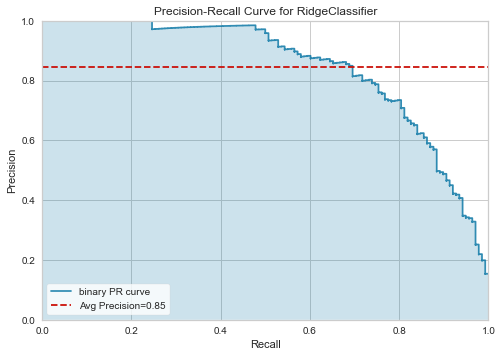

In [17]:
# Plotting Precision-Recall Curve
try:
    plot_model(tuned_ridge,plot='pr',scale=1)
except:
    print("Cannot plot the graph !!!")

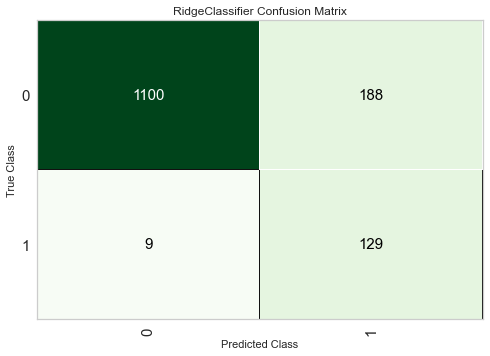

In [18]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_ridge,plot='confusion_matrix',scale=1)
except:
    print("Cannot plot the graph !!!")

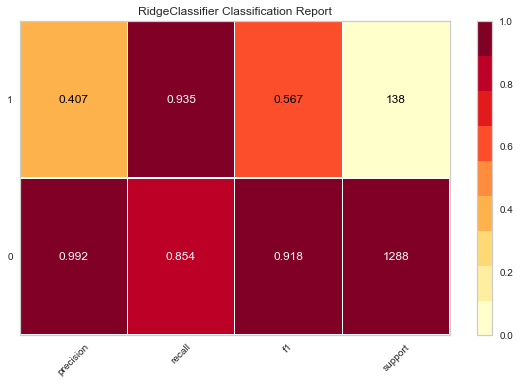

In [19]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_ridge,plot='class_report',scale=1)
except:
    print("Cannot plot the graph !!!")

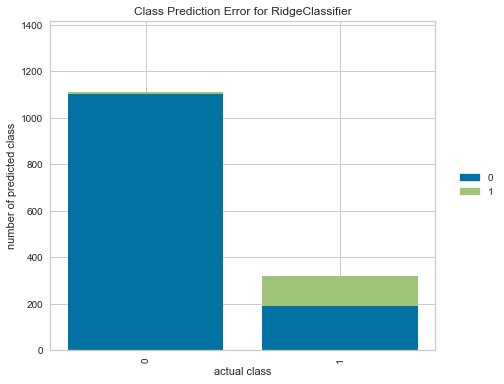

In [20]:
#Plotting AUC Curve
try:
    plot_model(tuned_ridge,plot='error',scale=1)
except:
    print("Cannot plot the graph !!!")

In [21]:
#Plotting AUC Curve
try:
    plot_model(tuned_ridge,plot='auc',scale=1)
except:
    print("Cannot plot the graph !!!")

Cannot plot the graph !!!


In [22]:
# Predit the test data
predict_model(tuned_ridge);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8619,0,0.9348,0.4069,0.567,0.4995,0.5609


In [23]:
# Finalize the model
final_ridge = finalize_model(tuned_ridge)

In [24]:
# Test the final model
predict_model(final_ridge,encoded_labels=True);
final_ridge

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9229,0,0.2536,0.8333,0.3889,0.36,0.434


RidgeClassifier(alpha=0.895, class_weight=None, copy_X=True,
                fit_intercept=False, max_iter=None, normalize=True,
                random_state=123, solver='auto', tol=0.001)

In [25]:
# Apply the model on the unseen data
unseen_predictions_ridge = predict_model(final_ridge, data=data_unseen,encoded_labels=True)
unseen_predictions_ridge.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label
0,61,37,131,94,1,2.9,1,0,0,0,0,1,0,0
1,47,21,125,93,1,5.7,1,112,0,1,0,0,0,0
2,31,7,135,94,4,3.8,2,0,1,0,1,1,1,1
3,65,41,51,94,2,1.1,1,0,0,0,0,1,0,0
4,37,13,84,92,1,3.6,2,0,0,1,0,0,0,0


In [26]:
# Score the performance of the model on the unseen data.
final_score_df = pd.DataFrame(columns=['Model','Recall','Accuracy','Precision','F1'])


In [27]:
recall_score = check_metric(unseen_predictions_ridge['Personal Loan'], unseen_predictions_ridge['Label'], 'Recall')
accu_score = check_metric(unseen_predictions_ridge['Personal Loan'], unseen_predictions_ridge['Label'], 'Accuracy')
precs_score = check_metric(unseen_predictions_ridge['Personal Loan'], unseen_predictions_ridge['Label'], 'Precision')
f1_score = check_metric(unseen_predictions_ridge['Personal Loan'], unseen_predictions_ridge['Label'], 'F1')
tmp_data = {'Model':'Ridge',
            'Accuracy':accu_score,
            'Recall':recall_score,
            'Precision':precs_score,
            'F1':f1_score}
final_score_df = final_score_df.append(tmp_data,ignore_index=True)

final_score_df


,Model,Recall,Accuracy,Precision,F1
0,Ridge,0.2,0.932,0.8,0.32


## (2) Support Vector - Linear

In [28]:
# Creating a model for the svm Classifier
svm = create_model('svm',fold=10,cross_validation=True)
svm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9249,0.0000,0.9062,0.5686,0.6988,0.6585,0.6818
1,0.8829,0.0000,0.7500,0.4364,0.5517,0.4897,0.5135
2,0.9069,0.0000,1.0000,0.5156,0.6804,0.6323,0.6800
3,0.9219,0.0000,0.8788,0.5686,0.6905,0.6481,0.6683
4,0.9307,0.0000,0.9062,0.5918,0.7160,0.6786,0.6986
5,0.8645,0.0000,0.8438,0.4030,0.5455,0.4773,0.5224
6,0.9127,0.0000,0.9375,0.5263,0.6742,0.6283,0.6632
7,0.9337,0.0000,0.9062,0.6042,0.7250,0.6890,0.7074
8,0.9066,0.0000,0.9375,0.5085,0.6593,0.6107,0.6491
9,0.9217,0.0000,0.9062,0.5577,0.6905,0.6485,0.6736


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:

# Tuning the svm Classifier and optimizing it for 'Recall'
tuned_svm = tune_model(svm,optimize='Recall')
tuned_svm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9459,0.0000,0.9062,0.6591,0.7632,0.7335,0.7454
1,0.8979,0.0000,0.7500,0.4800,0.5854,0.5303,0.5475
2,0.9099,0.0000,1.0000,0.5238,0.6875,0.6408,0.6866
3,0.9039,0.0000,0.8788,0.5088,0.6444,0.5934,0.6231
4,0.9367,0.0000,0.9062,0.6170,0.7342,0.6997,0.7164
5,0.9066,0.0000,0.8125,0.5098,0.6265,0.5763,0.5968
6,0.9247,0.0000,0.9062,0.5686,0.6988,0.6583,0.6817
7,0.9096,0.0000,0.9062,0.5179,0.6591,0.6114,0.6433
8,0.9247,0.0000,0.9062,0.5686,0.6988,0.6583,0.6817
9,0.9157,0.0000,0.9375,0.5357,0.6818,0.6373,0.6706


SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.6, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

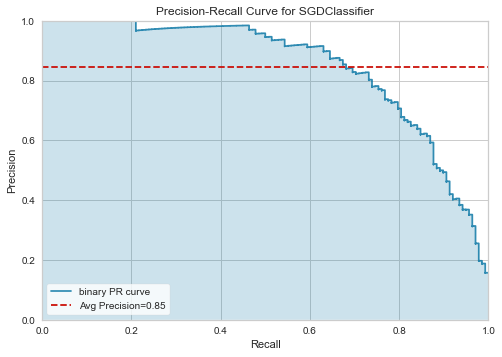

In [30]:
# Plotting Precision -Recall Curve
try:
    plot_model(tuned_svm,plot='pr',scale=1)
except:
    print("Cannot plot the graph !!!")

In [31]:
#Plotting AUC Curve
try:
    plot_model(tuned_svm,plot='auc',scale=1)
except:
    print("Cannot plot the graph !!!")

Cannot plot the graph !!!


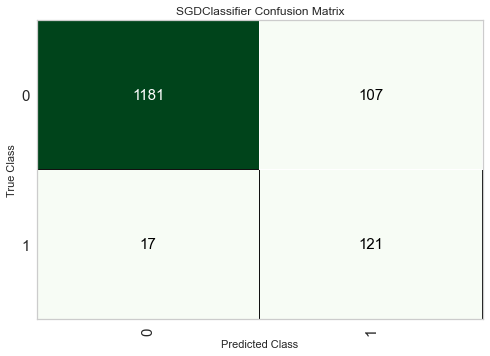

In [32]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_svm,plot='confusion_matrix',scale=1)
except:
    print("Cannot plot the graph !!!")

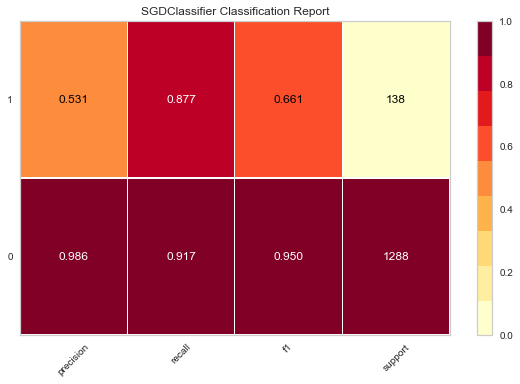

In [33]:
#Plotting AUC Curve
try:
    plot_model(tuned_svm,plot='class_report',scale=1)
except:
    print("Cannot plot the graph !!!")

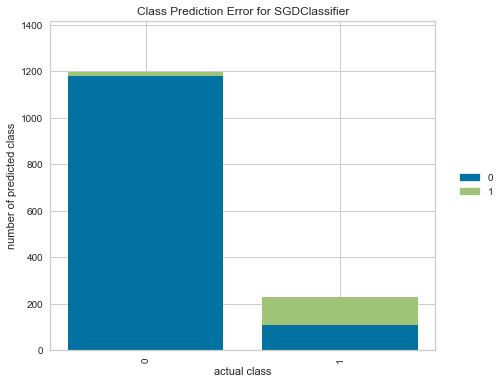

In [34]:
#Plotting AUC Curve
try:
    plot_model(tuned_svm,plot='error',scale=1)
except:
    print("Cannot plot the graph !!!")

In [35]:
# Predit the test data
predict_model(tuned_svm);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.913,0,0.8768,0.5307,0.6612,0.6148,0.6403


In [36]:
# Finalize the model
final_svm = finalize_model(tuned_svm)
final_svm

SGDClassifier(alpha=0.0005, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.6, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
# Apply the model on the unseen data
unseen_predictions_svm = predict_model(final_svm, data=data_unseen,encoded_labels=True)
unseen_predictions_svm.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label
0,61,37,131,94,1,2.9,1,0,0,0,0,1,0,0
1,47,21,125,93,1,5.7,1,112,0,1,0,0,0,0
2,31,7,135,94,4,3.8,2,0,1,0,1,1,1,1
3,65,41,51,94,2,1.1,1,0,0,0,0,1,0,0
4,37,13,84,92,1,3.6,2,0,0,1,0,0,0,0


In [38]:
recall_score = check_metric(unseen_predictions_svm['Personal Loan'], unseen_predictions_svm['Label'], 'Recall')
accu_score = check_metric(unseen_predictions_svm['Personal Loan'], unseen_predictions_svm['Label'], 'Accuracy')
precs_score = check_metric(unseen_predictions_svm['Personal Loan'], unseen_predictions_svm['Label'], 'Precision')
f1_score = check_metric(unseen_predictions_svm['Personal Loan'], unseen_predictions_svm['Label'], 'F1')
tmp_data = {'Model':'SVM-Linear',
            'Accuracy':accu_score,
            'Recall':recall_score,
            'Precision':precs_score,
            'F1':f1_score}
final_score_df = final_score_df.append(tmp_data,ignore_index=True)
final_score_df

,Model,Recall,Accuracy,Precision,F1
0,Ridge,0.20,0.932,0.8000,0.3200
1,SVM-Linear,0.65,0.968,0.9286,0.7647


## (3) Support Vector Machine - RBF


In [39]:

# Creating a model for the rbfsvm Classifier
rbfsvm = create_model('rbfsvm',fold=10,cross_validation=True)
rbfsvm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9820,0.9969,0.9375,0.8824,0.9091,0.8991,0.8996
1,0.9640,0.9627,0.7500,0.8571,0.8000,0.7803,0.7824
2,0.9640,0.9971,1.0000,0.7333,0.8462,0.8263,0.8390
3,0.9730,0.9744,0.9091,0.8333,0.8696,0.8545,0.8555
4,0.9759,0.9936,0.9375,0.8333,0.8824,0.8690,0.8709
5,0.9367,0.9635,0.7812,0.6410,0.7042,0.6692,0.6733
6,0.9699,0.9975,0.9375,0.7895,0.8571,0.8404,0.8443
7,0.9699,0.9944,0.9688,0.7750,0.8611,0.8445,0.8511
8,0.9699,0.9966,1.0000,0.7619,0.8649,0.8483,0.8582
9,0.9729,0.9843,0.9375,0.8108,0.8696,0.8545,0.8573


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [40]:

# Tuning the rbfsvm Classifier and optimizing it for 'Recall'
tuned_rbfsvm = tune_model(rbfsvm,optimize='Recall')
tuned_rbfsvm

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9820,0.9958,0.9375,0.8824,0.9091,0.8991,0.8996
1,0.9610,0.9575,0.7812,0.8065,0.7937,0.7721,0.7722
2,0.9580,0.9965,1.0000,0.7021,0.8250,0.8019,0.8181
3,0.9610,0.9749,0.9091,0.7500,0.8219,0.8002,0.8049
4,0.9639,0.9925,0.9375,0.7500,0.8333,0.8133,0.8197
5,0.9307,0.9602,0.8125,0.6047,0.6933,0.6552,0.6643
6,0.9669,0.9973,0.9375,0.7692,0.8451,0.8267,0.8318
7,0.9639,0.9929,0.9688,0.7381,0.8378,0.8179,0.8275
8,0.9699,0.9953,1.0000,0.7619,0.8649,0.8483,0.8582
9,0.9639,0.9819,0.9375,0.7500,0.8333,0.8133,0.8197


SVC(C=0.48, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='rbf', max_iter=-1, probability=True, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

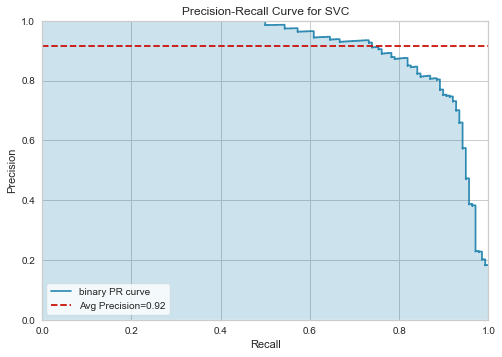

In [41]:
# Plotting Precision -Recall Curve
try:
    plot_model(tuned_rbfsvm,plot='pr',scale=1)
except:
    print("Cannot plot the graph !!!")

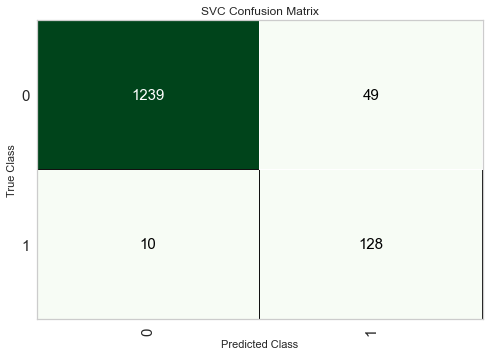

In [42]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_rbfsvm,plot='confusion_matrix',scale=1)
except:
    print("Cannot plot the graph !!!")

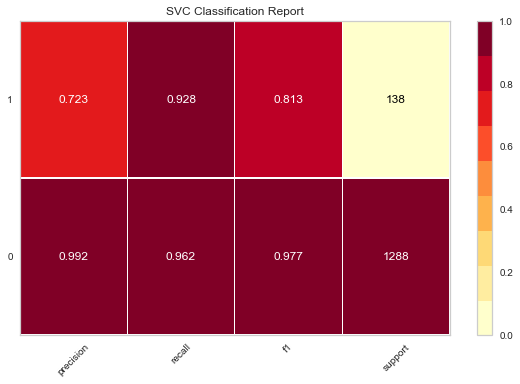

In [43]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_rbfsvm,plot='class_report',scale=1)
except:
    print("Cannot plot the graph !!!")

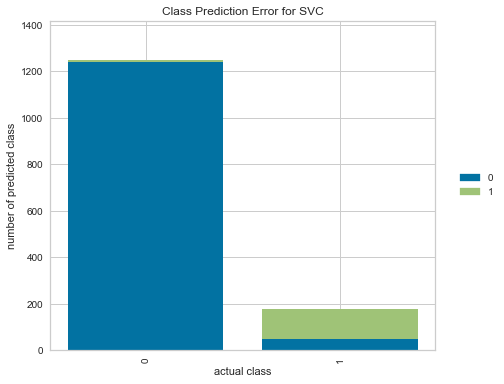

In [44]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_rbfsvm,plot='error',scale=1)
except:
    print("Cannot plot the graph !!!")

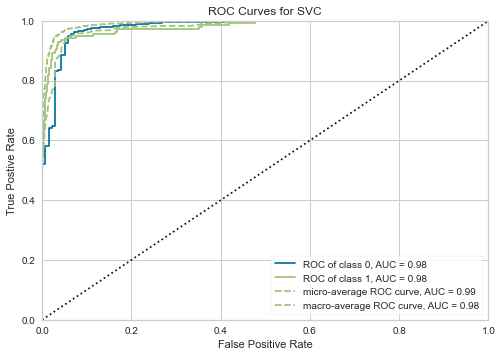

In [45]:

#Plotting AUC Curve
try:
    plot_model(tuned_rbfsvm,plot='auc',scale=1)
except:
    print("Cannot plot the graph !!!")

In [46]:
# Predit the test data
predict_model(tuned_rbfsvm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Radial Kernel,0.9586,0.9797,0.9275,0.7232,0.8127,0.7898,0.7976


In [47]:
# Finalize the model
final_rbfsvm = finalize_model(tuned_rbfsvm)
final_rbfsvm

SVC(C=0.48, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto',
    kernel='rbf', max_iter=-1, probability=True, random_state=123,
    shrinking=True, tol=0.001, verbose=False)

In [48]:
# Apply the model on the unseen data
unseen_predictions_rbfsvm = predict_model(final_rbfsvm, data=data_unseen,encoded_labels=True)
unseen_predictions_rbfsvm.head()


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,61,37,131,94,1,2.9,1,0,0,0,0,1,0,0,0.0070
1,47,21,125,93,1,5.7,1,112,0,1,0,0,0,0,0.0140
2,31,7,135,94,4,3.8,2,0,1,0,1,1,1,1,1.0000
3,65,41,51,94,2,1.1,1,0,0,0,0,1,0,0,0.0000
4,37,13,84,92,1,3.6,2,0,0,1,0,0,0,0,0.0597


In [49]:
recall_score = check_metric(unseen_predictions_rbfsvm['Personal Loan'], unseen_predictions_rbfsvm['Label'], 'Recall')
accu_score = check_metric(unseen_predictions_rbfsvm['Personal Loan'], unseen_predictions_rbfsvm['Label'], 'Accuracy')
precs_score = check_metric(unseen_predictions_rbfsvm['Personal Loan'], unseen_predictions_rbfsvm['Label'], 'Precision')
f1_score = check_metric(unseen_predictions_rbfsvm['Personal Loan'], unseen_predictions_rbfsvm['Label'], 'F1')
tmp_data = {'Model':'SVM-RBF',
            'Accuracy':accu_score,
            'Recall':recall_score,
            'Precision':precs_score,
            'F1':f1_score}
final_score_df = final_score_df.append(tmp_data,ignore_index=True)
final_score_df

,Model,Recall,Accuracy,Precision,F1
0,Ridge,0.20,0.932,0.8000,0.3200
1,SVM-Linear,0.65,0.968,0.9286,0.7647
2,SVM-RBF,0.95,0.968,0.7308,0.8261


## (4) K-Nearest Neighbors


In [50]:
# Creating a model for the knn Classifier
knn = create_model('knn',fold=10,cross_validation=True)
knn


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9640,0.9712,0.8750,0.7778,0.8235,0.8035,0.8053
1,0.9429,0.9167,0.8438,0.6585,0.7397,0.7082,0.7151
2,0.9520,0.9713,0.9091,0.6977,0.7895,0.7629,0.7714
3,0.9249,0.9276,0.7879,0.5909,0.6753,0.6339,0.6422
4,0.9578,0.9755,0.9375,0.7143,0.8108,0.7876,0.7968
5,0.8825,0.8376,0.5938,0.4222,0.4935,0.4292,0.4372
6,0.9398,0.9648,0.8750,0.6364,0.7368,0.7038,0.7152
7,0.9398,0.9644,0.8438,0.6429,0.7297,0.6965,0.7047
8,0.9428,0.9577,0.8438,0.6585,0.7397,0.7081,0.7150
9,0.9307,0.9501,0.9062,0.5918,0.7160,0.6786,0.6986


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:

# Tuning the knn Classifier and optimizing it for 'Recall'
tuned_knn = tune_model(knn,optimize='Recall')
tuned_knn

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9550,0.8982,0.6250,0.8696,0.7273,0.7034,0.7148
1,0.9459,0.8626,0.6250,0.7692,0.6897,0.6604,0.6647
2,0.9459,0.8958,0.6061,0.8000,0.6897,0.6607,0.6683
3,0.9399,0.8191,0.6667,0.7097,0.6875,0.6543,0.6547
4,0.9669,0.9423,0.8438,0.8182,0.8308,0.8124,0.8125
5,0.9247,0.7885,0.5625,0.6207,0.5902,0.5488,0.5496
6,0.9759,0.9440,0.8750,0.8750,0.8750,0.8617,0.8617
7,0.9458,0.8744,0.7188,0.7188,0.7188,0.6888,0.6888
8,0.9518,0.8607,0.6875,0.7857,0.7333,0.7070,0.7089
9,0.9488,0.8944,0.7812,0.7143,0.7463,0.7179,0.7187


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

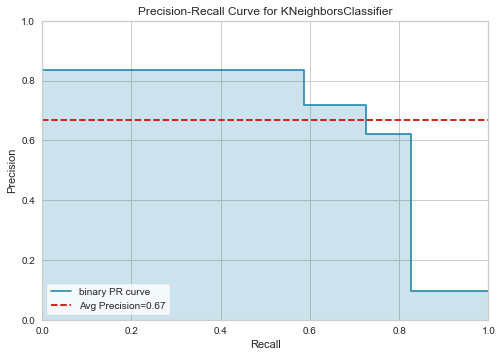

In [52]:
# Plotting Precision -Recall Curve
try:
    plot_model(tuned_knn,plot='pr',scale=1)
except:
    print("Cannot plot the graph !!!")

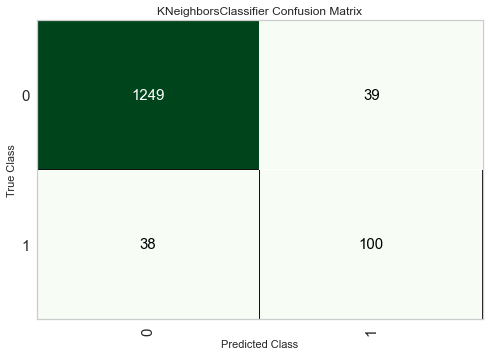

In [53]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_knn,plot='confusion_matrix',scale=1)
except:
    print("Cannot plot the graph !!!")
    

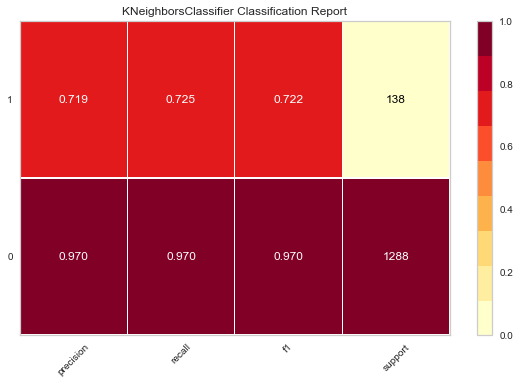

In [54]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_knn,plot='class_report',scale=1)
except:
    print("Cannot plot the graph !!!")

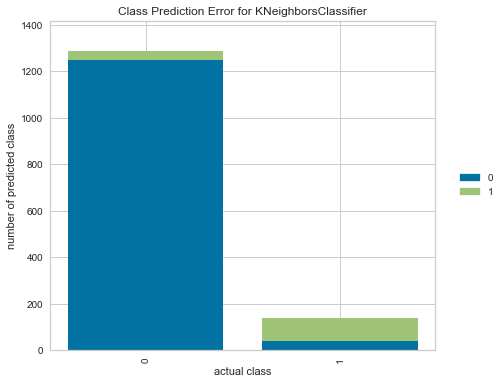

In [55]:
#Plotting AUC Curve
try:
    plot_model(tuned_knn,plot='error',scale=1)
except:
    print("Cannot plot the graph !!!")

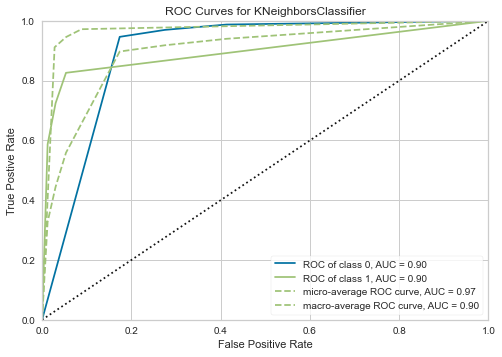

In [56]:
#Plotting AUC Curve
try:
    plot_model(tuned_knn,plot='auc',scale=1)
except:
    print("Cannot plot the graph !!!")
    

In [57]:
# Predit the test data
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.946,0.8975,0.7246,0.7194,0.722,0.6921,0.6921


In [58]:
# Finalize the model
final_knn = finalize_model(tuned_knn)
final_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')

In [59]:
# Apply the model on the unseen data
unseen_predictions_knn = predict_model(final_knn, data=data_unseen,encoded_labels=True)
unseen_predictions_knn.head()


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,61,37,131,94,1,2.9,1,0,0,0,0,1,0,0,0.0
1,47,21,125,93,1,5.7,1,112,0,1,0,0,0,0,0.0
2,31,7,135,94,4,3.8,2,0,1,0,1,1,1,1,1.0
3,65,41,51,94,2,1.1,1,0,0,0,0,1,0,0,0.0
4,37,13,84,92,1,3.6,2,0,0,1,0,0,0,0,0.0


In [60]:
recall_score = check_metric(unseen_predictions_knn['Personal Loan'], unseen_predictions_knn['Label'], 'Recall')
accu_score = check_metric(unseen_predictions_knn['Personal Loan'], unseen_predictions_knn['Label'], 'Accuracy')
precs_score = check_metric(unseen_predictions_knn['Personal Loan'], unseen_predictions_knn['Label'], 'Precision')
f1_score = check_metric(unseen_predictions_knn['Personal Loan'], unseen_predictions_knn['Label'], 'F1')
tmp_data = {'Model':'KNN',
            'Accuracy':accu_score,
            'Recall':recall_score,
            'Precision':precs_score,
            'F1':f1_score}
final_score_df = final_score_df.append(tmp_data,ignore_index=True)
final_score_df

,Model,Recall,Accuracy,Precision,F1
0,Ridge,0.20,0.932,0.8000,0.3200
1,SVM-Linear,0.65,0.968,0.9286,0.7647
2,SVM-RBF,0.95,0.968,0.7308,0.8261
3,KNN,0.45,0.956,1.0000,0.6207


## (5) Naive-Bayes


In [61]:
# Creating a model for the nb Classifier
nb = create_model('nb',fold=10,cross_validation=True)
nb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9520,0.9883,0.9375,0.6818,0.7895,0.7631,0.7755
1,0.9279,0.9423,0.7812,0.5952,0.6757,0.6360,0.6434
2,0.9369,0.9719,0.9091,0.6250,0.7407,0.7062,0.7223
3,0.8829,0.9095,0.7273,0.4444,0.5517,0.4888,0.5085
4,0.9367,0.9766,0.8750,0.6222,0.7273,0.6926,0.7055
5,0.9006,0.9436,0.8438,0.4909,0.6207,0.5680,0.5957
6,0.9398,0.9753,0.8438,0.6429,0.7297,0.6965,0.7047
7,0.9337,0.9671,0.8750,0.6087,0.7179,0.6818,0.6962
8,0.9398,0.9765,0.8125,0.6500,0.7222,0.6889,0.6943
9,0.5994,0.8698,0.8750,0.1783,0.2963,0.1621,0.2630


GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
# Tuning the nb Classifier and optimizing it for 'Recall'
tuned_nb = tune_model(nb,optimize='Recall')
tuned_nb

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9520,0.9883,0.9375,0.6818,0.7895,0.7631,0.7755
1,0.9279,0.9423,0.7812,0.5952,0.6757,0.6360,0.6434
2,0.9369,0.9719,0.9091,0.6250,0.7407,0.7062,0.7223
3,0.8829,0.9095,0.7273,0.4444,0.5517,0.4888,0.5085
4,0.9367,0.9766,0.8750,0.6222,0.7273,0.6926,0.7055
5,0.9006,0.9436,0.8438,0.4909,0.6207,0.5680,0.5957
6,0.9398,0.9753,0.8438,0.6429,0.7297,0.6965,0.7047
7,0.9337,0.9671,0.8750,0.6087,0.7179,0.6818,0.6962
8,0.9398,0.9765,0.8125,0.6500,0.7222,0.6889,0.6943
9,0.6807,0.8698,0.8750,0.2154,0.3457,0.2259,0.3235


GaussianNB(priors=None, var_smoothing=1e-07)

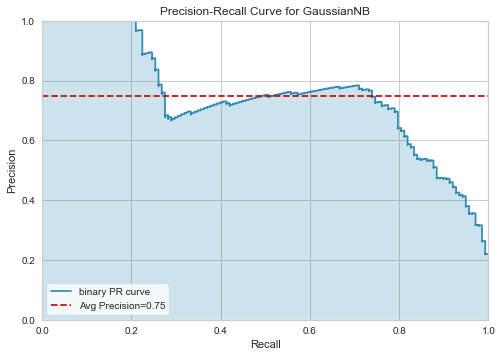

In [63]:
# Plotting Precision -Recall Curve
try:
    plot_model(tuned_nb,plot='pr',scale=1)
except:
    print("Cannot plot the graph !!!")
    

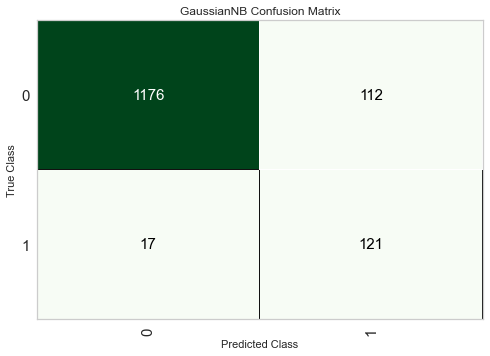

In [64]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_nb,plot='confusion_matrix',scale=1)
except:
    print("Cannot plot the graph !!!")

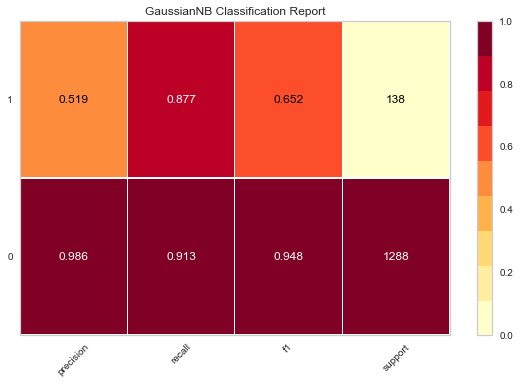

In [65]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_nb,plot='class_report',scale=1)
except:
    print("Cannot plot the graph !!!")

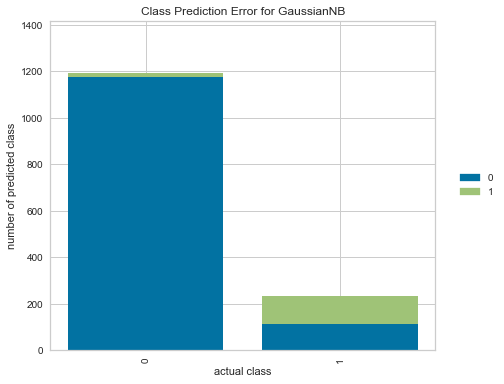

In [66]:
#Plotting AUC Curve
try:
    plot_model(tuned_nb,plot='error',scale=1)
except:
    print("Cannot plot the graph !!!")

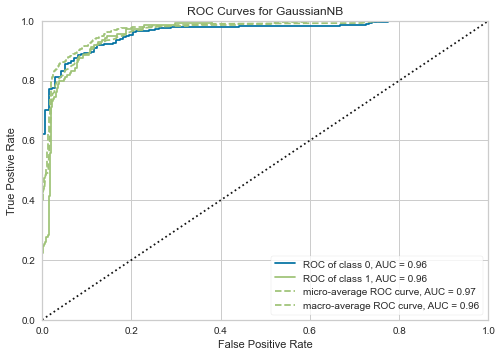

In [67]:
#Plotting AUC Curve
try:
    plot_model(tuned_nb,plot='auc',scale=1)
except:
    print("Cannot plot the graph !!!")
    

In [68]:
# Predit the test data
predict_model(tuned_nb);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9095,0.9631,0.8768,0.5193,0.6523,0.6042,0.6316


In [69]:
# Finalize the model
final_nb = finalize_model(tuned_nb)
final_nb

GaussianNB(priors=None, var_smoothing=1e-07)

In [70]:
# Apply the model on the unseen data
unseen_predictions_nb = predict_model(final_nb, data=data_unseen,encoded_labels=True)
unseen_predictions_nb.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,61,37,131,94,1,2.9,1,0,0,0,0,1,0,0,0.0275
1,47,21,125,93,1,5.7,1,112,0,1,0,0,0,0,0.3120
2,31,7,135,94,4,3.8,2,0,1,0,1,1,1,1,1.0000
3,65,41,51,94,2,1.1,1,0,0,0,0,1,0,0,0.0000
4,37,13,84,92,1,3.6,2,0,0,1,0,0,0,0,0.0505


In [71]:
recall_score = check_metric(unseen_predictions_nb['Personal Loan'], unseen_predictions_nb['Label'], 'Recall')
accu_score = check_metric(unseen_predictions_nb['Personal Loan'], unseen_predictions_nb['Label'], 'Accuracy')
precs_score = check_metric(unseen_predictions_nb['Personal Loan'], unseen_predictions_nb['Label'], 'Precision')
f1_score = check_metric(unseen_predictions_nb['Personal Loan'], unseen_predictions_nb['Label'], 'F1')
tmp_data = {'Model':'Naive Bayes',
            'Accuracy':accu_score,
            'Recall':recall_score,
            'Precision':precs_score,
            'F1':f1_score}
final_score_df = final_score_df.append(tmp_data,ignore_index=True)
final_score_df

,Model,Recall,Accuracy,Precision,F1
0,Ridge,0.20,0.932,0.8000,0.3200
1,SVM-Linear,0.65,0.968,0.9286,0.7647
2,SVM-RBF,0.95,0.968,0.7308,0.8261
3,KNN,0.45,0.956,1.0000,0.6207
4,Naive Bayes,0.55,0.940,0.6471,0.5946


## (6) Logistic Regression


In [72]:
# Creating a model for the lr Classifier
lr = create_model('lr',fold=10,cross_validation=True)
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9459,0.9855,0.9062,0.6591,0.7632,0.7335,0.7454
1,0.9009,0.9327,0.7500,0.4898,0.5926,0.5390,0.5549
2,0.9099,0.9875,1.0000,0.5238,0.6875,0.6408,0.6866
3,0.9009,0.9546,0.8485,0.5000,0.6292,0.5764,0.6033
4,0.9367,0.9795,0.9062,0.6170,0.7342,0.6997,0.7164
5,0.9006,0.9386,0.8125,0.4906,0.6118,0.5587,0.5821
6,0.9307,0.9859,0.9062,0.5918,0.7160,0.6786,0.6986
7,0.9187,0.9835,0.9688,0.5439,0.6966,0.6539,0.6903
8,0.9277,0.9860,0.9062,0.5800,0.7073,0.6683,0.6900
9,0.9157,0.9698,0.9375,0.5357,0.6818,0.6373,0.6706


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
# Tuning the lr Classifier and optimizing it for 'Recall'
tuned_lr = tune_model(lr,optimize='Recall')
tuned_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9520,0.9852,0.9062,0.6905,0.7838,0.7573,0.7662
1,0.9009,0.9331,0.7500,0.4898,0.5926,0.5390,0.5549
2,0.9099,0.9874,1.0000,0.5238,0.6875,0.6408,0.6866
3,0.9009,0.9544,0.8485,0.5000,0.6292,0.5764,0.6033
4,0.9367,0.9794,0.9062,0.6170,0.7342,0.6997,0.7164
5,0.8976,0.9372,0.8125,0.4815,0.6047,0.5502,0.5751
6,0.9307,0.9858,0.9062,0.5918,0.7160,0.6786,0.6986
7,0.9157,0.9841,0.9688,0.5345,0.6889,0.6448,0.6830
8,0.9277,0.9859,0.9062,0.5800,0.7073,0.6683,0.6900
9,0.9157,0.9692,0.9375,0.5357,0.6818,0.6373,0.6706


LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

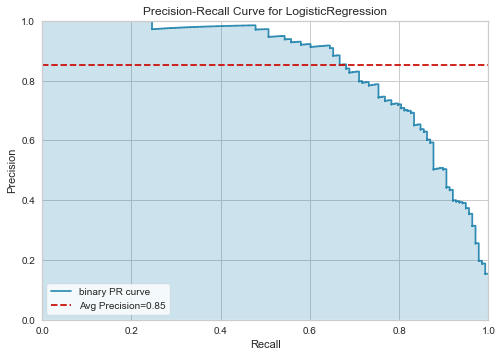

In [74]:
# Plotting Precision -Recall Curve
try:
    plot_model(tuned_lr,plot='pr',scale=1)
except:
    print("Cannot plot the graph !!!")

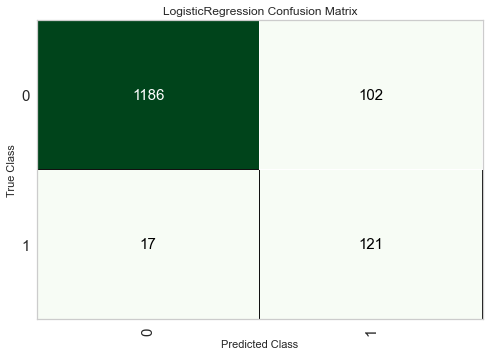

In [75]:
# Plotting Confusion Matrix
try:
    plot_model(tuned_lr,plot='confusion_matrix',scale=1)
except:
    print("Cannot plot the graph !!!")

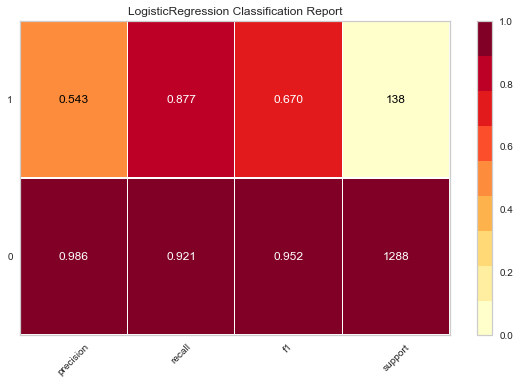

In [76]:
#Plotting AUC Curve
try:
    plot_model(tuned_lr,plot='class_report',scale=1)
except:
    print("Cannot plot the graph !!!")

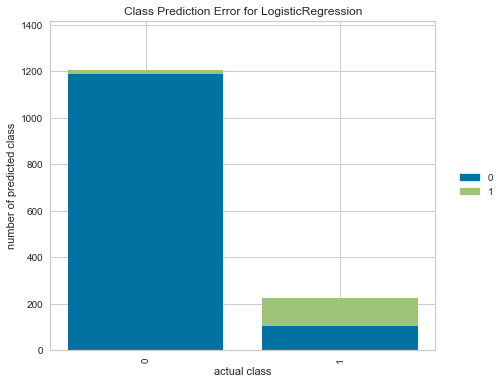

In [77]:
#Plotting AUC Curve
try:
    plot_model(tuned_lr,plot='error',scale=1)
except:
    print("Cannot plot the graph !!!")

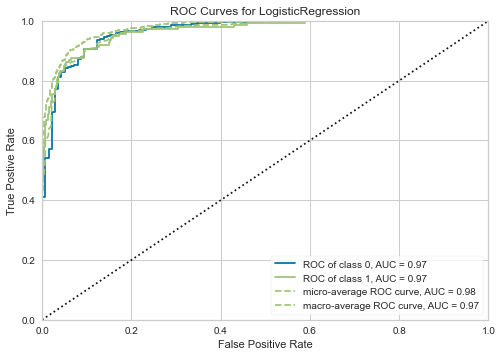

In [78]:
#Plotting AUC Curve
try:
    plot_model(tuned_lr,plot='auc',scale=1)
except:
    print("Cannot plot the graph !!!")

In [79]:
# Predit the test data
predict_model(tuned_lr);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9165,0.9662,0.8768,0.5426,0.6704,0.6256,0.6492


In [80]:
# Finalize the model
final_lr = finalize_model(tuned_lr)
final_lr

LogisticRegression(C=5.5600000000000005, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# Apply the model on the unseen data
unseen_predictions_lr = predict_model(final_lr, data=data_unseen,encoded_labels=True)
unseen_predictions_lr.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,61,37,131,94,1,2.9,1,0,0,0,0,1,0,0,0.2079
1,47,21,125,93,1,5.7,1,112,0,1,0,0,0,0,0.1752
2,31,7,135,94,4,3.8,2,0,1,0,1,1,1,1,0.9983
3,65,41,51,94,2,1.1,1,0,0,0,0,1,0,0,0.0003
4,37,13,84,92,1,3.6,2,0,0,1,0,0,0,0,0.1818


In [82]:
recall_score = check_metric(unseen_predictions_lr['Personal Loan'], unseen_predictions_lr['Label'], 'Recall')
accu_score = check_metric(unseen_predictions_lr['Personal Loan'], unseen_predictions_lr['Label'], 'Accuracy')
precs_score = check_metric(unseen_predictions_lr['Personal Loan'], unseen_predictions_lr['Label'], 'Precision')
f1_score = check_metric(unseen_predictions_lr['Personal Loan'], unseen_predictions_lr['Label'], 'F1')
tmp_data = {'Model':'Logistic Regression',
            'Accuracy':accu_score,
            'Recall':recall_score,
            'Precision':precs_score,
            'F1':f1_score}
final_score_df = final_score_df.append(tmp_data,ignore_index=True)
final_score_df

,Model,Recall,Accuracy,Precision,F1
0,Ridge,0.20,0.932,0.8000,0.3200
1,SVM-Linear,0.65,0.968,0.9286,0.7647
2,SVM-RBF,0.95,0.968,0.7308,0.8261
3,KNN,0.45,0.956,1.0000,0.6207
4,Naive Bayes,0.55,0.940,0.6471,0.5946
5,Logistic Regression,0.90,0.932,0.5455,0.6792


## (6)  Model Comparison and Conclusion

### (a) Precision Recall Curve Comparison

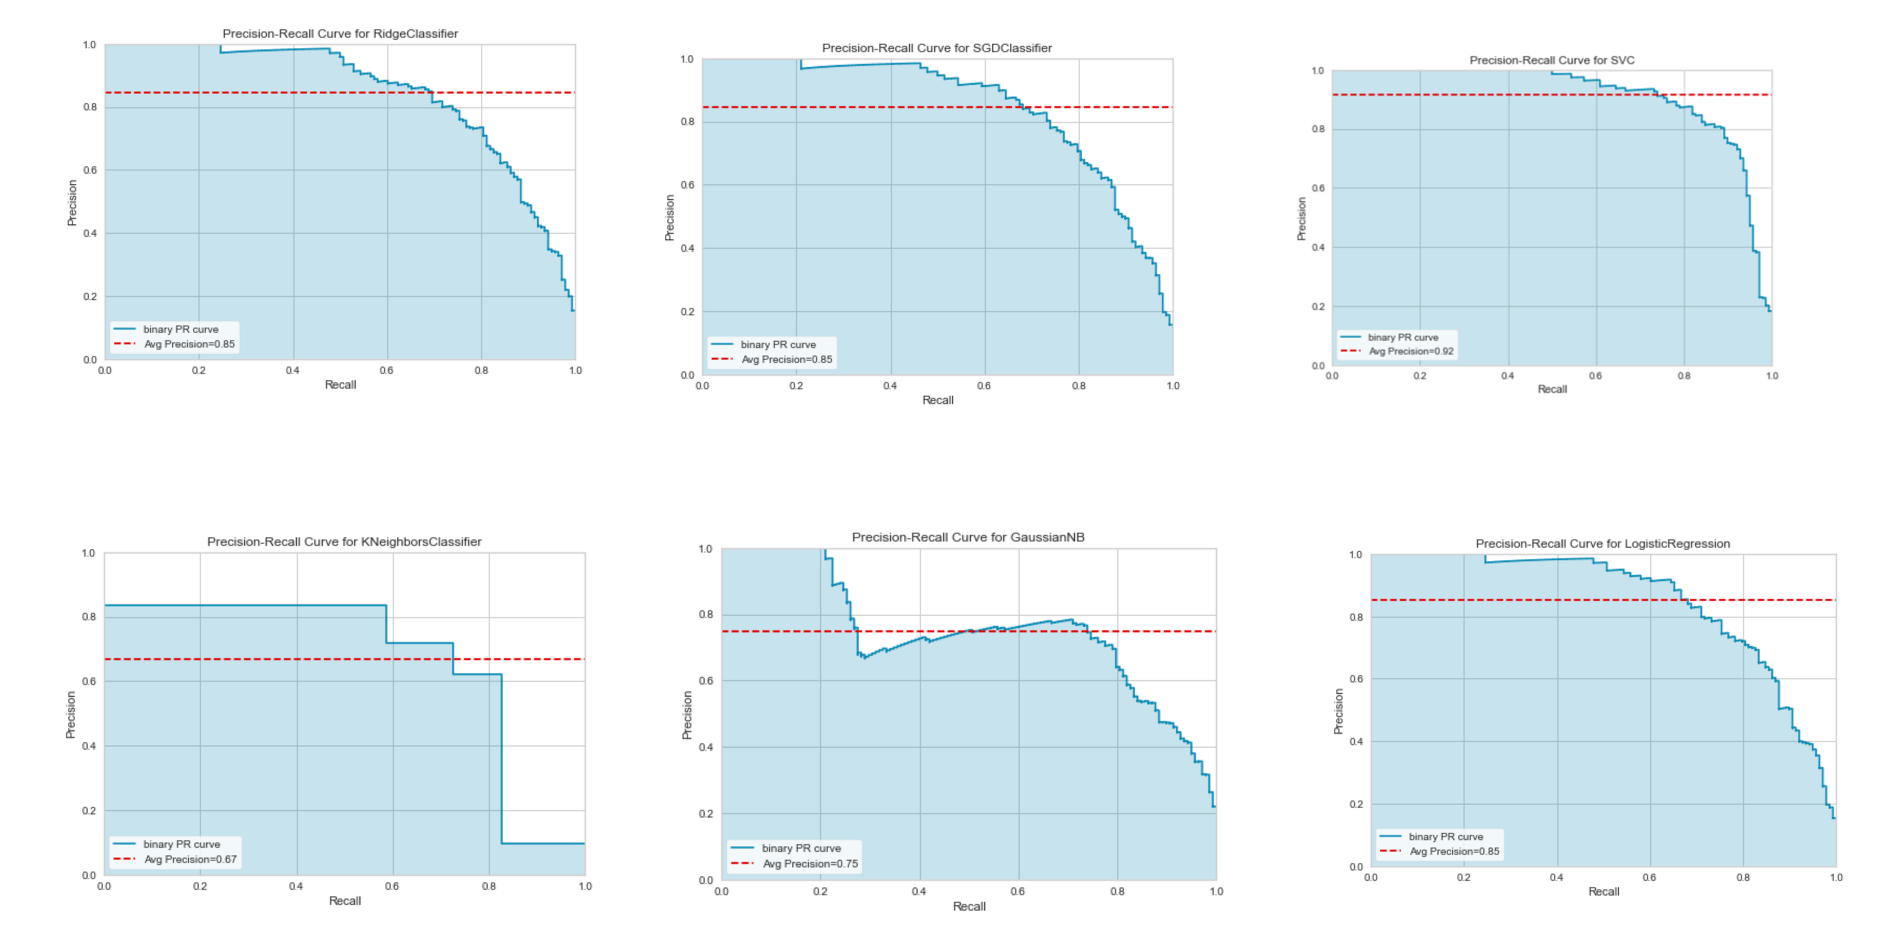
1. The SVM-RBF classifier has the highest average precision of 92% . This means that the SVM-RBF is 92% positive in identifying a potential loan customer.

### (b) ROC-AUC Curve Comparison

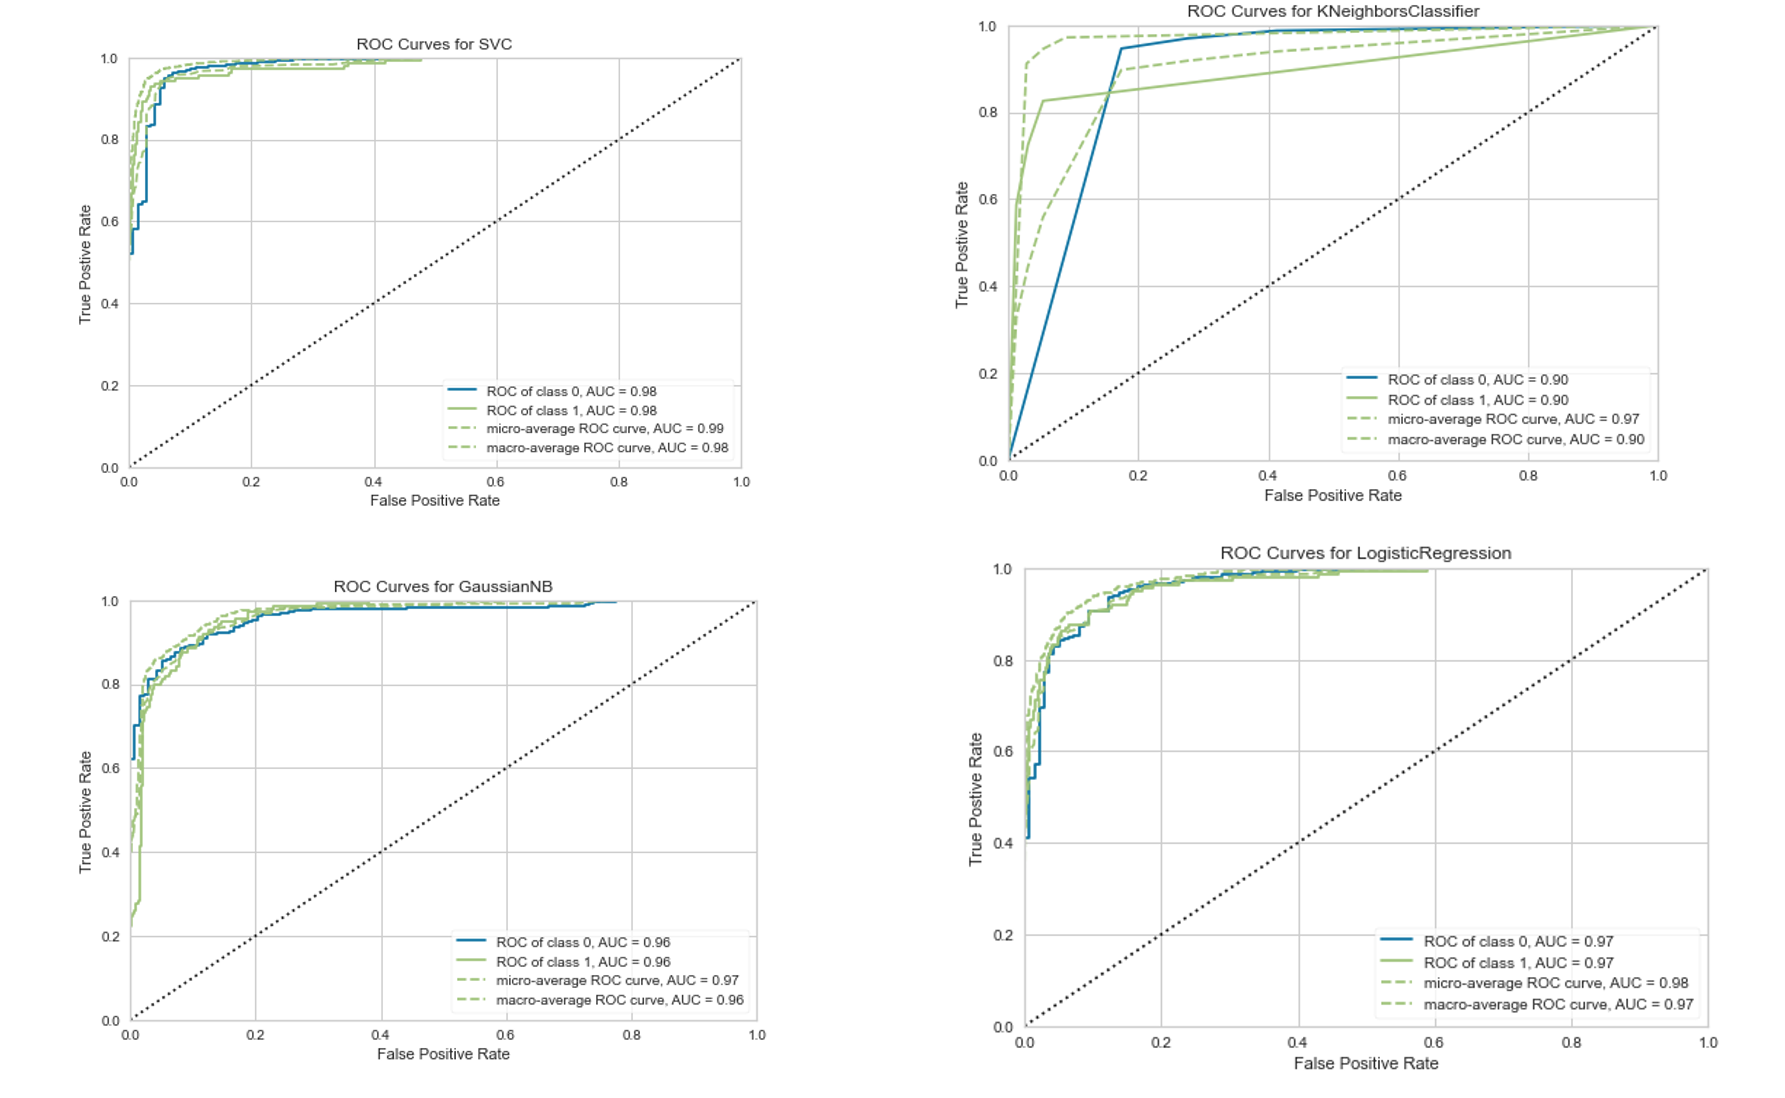

1. While SVM-RBF, KNN, Naive Bayes, Logistic Regressions show higher AUC of +90%, SVM-RBF has the highest AUC of 98%. This means that the SVM-RBF will predict a +ve with higher probability of 98% than the -ve. Which exactly is required in this case.

    * Note that PyCaret does not support ROC-AUC curves for some algorithms such as Ridge Classifier and SVM-Linear. Hence, those graphs have not been made available

### (c) Confusion Matrix Comparison

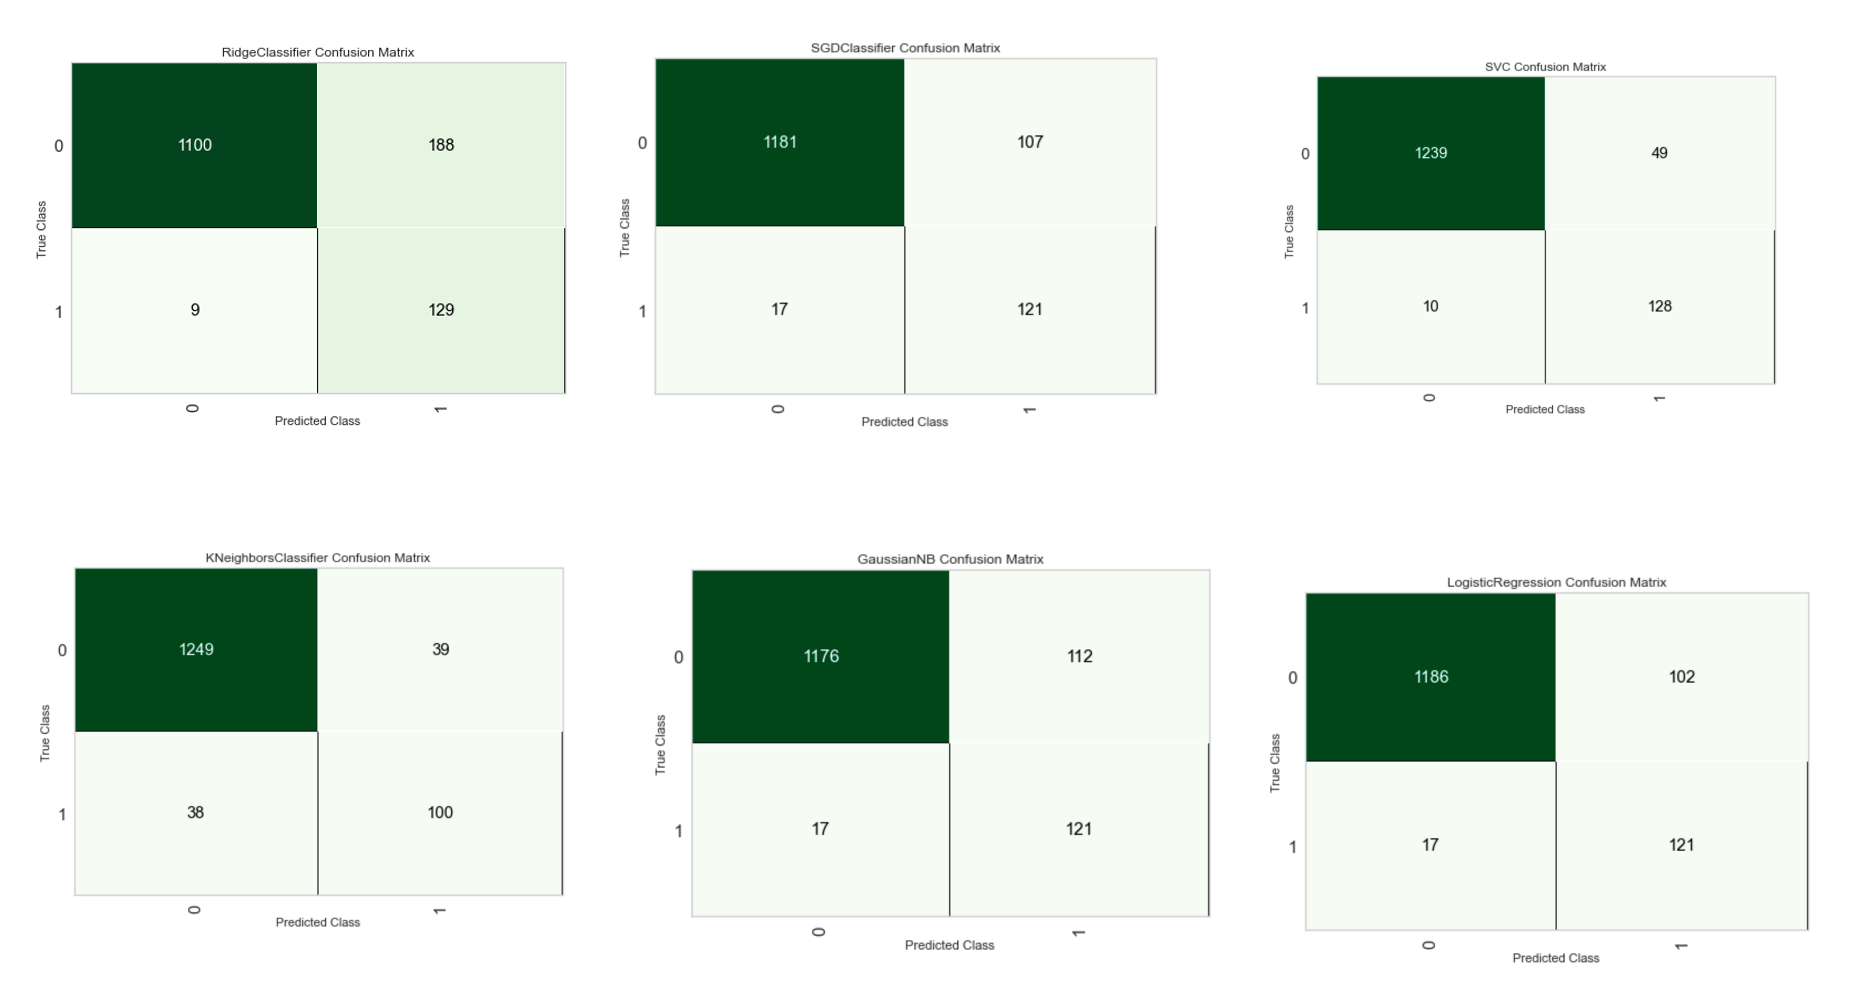

1. Both Ridge(129) and SVM-RBF(128) show higher number of True positives.
2. Between Ridge and SVM-RBF,Ridge shows higher number of False Positives.
3. True Negatives are highest with KNN and False Negatives are almost identical in case of Rideg(9) and SVM-RBF(10).
4. However, this classification problem is more concerned with positive predictions than negative.Hence, TN and FN may not be considered as a winning criteria.


### (d) Classification Report - Comparing Recall values for both classes.

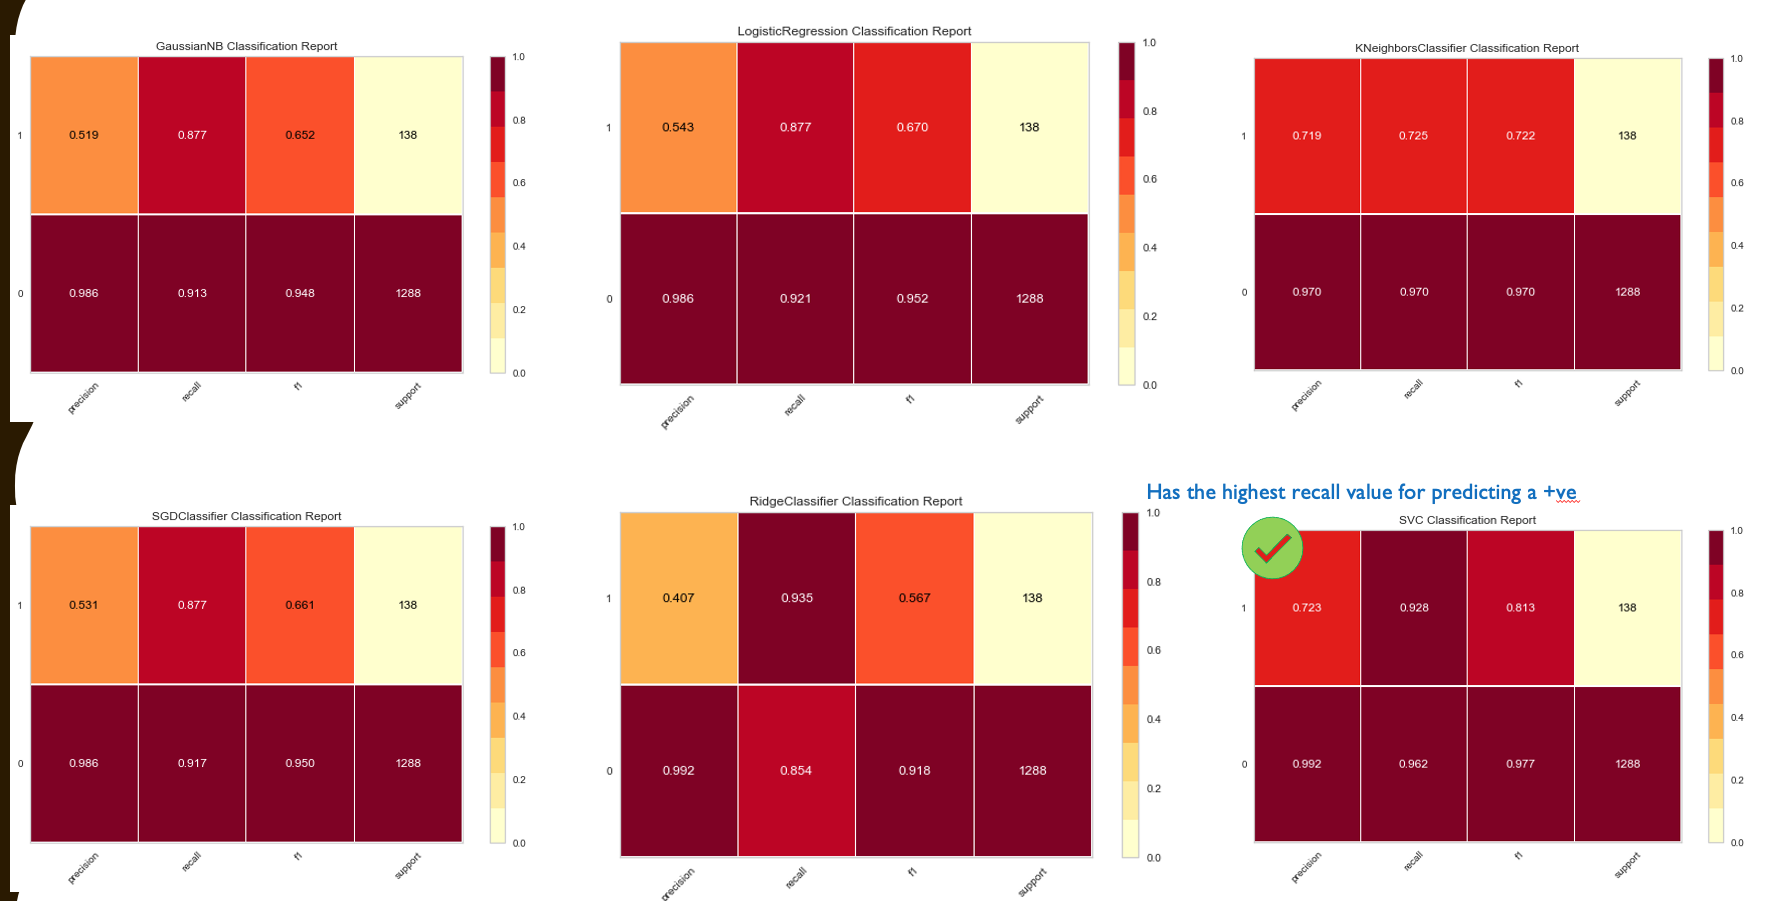

1. Ridge classifier has higher recall for class 1 at 93.5% and SVM-RBF at 92.8%.
2. SVM-RBF has a highert recall for class 0 at 96.2% while Ridge at 85.4 while KNN has the highest at 97%
3. SVM-RBF has recall for both class0 and class1 at higher values., that makes it preferable.

### (e)  Comparing errors for both classes.

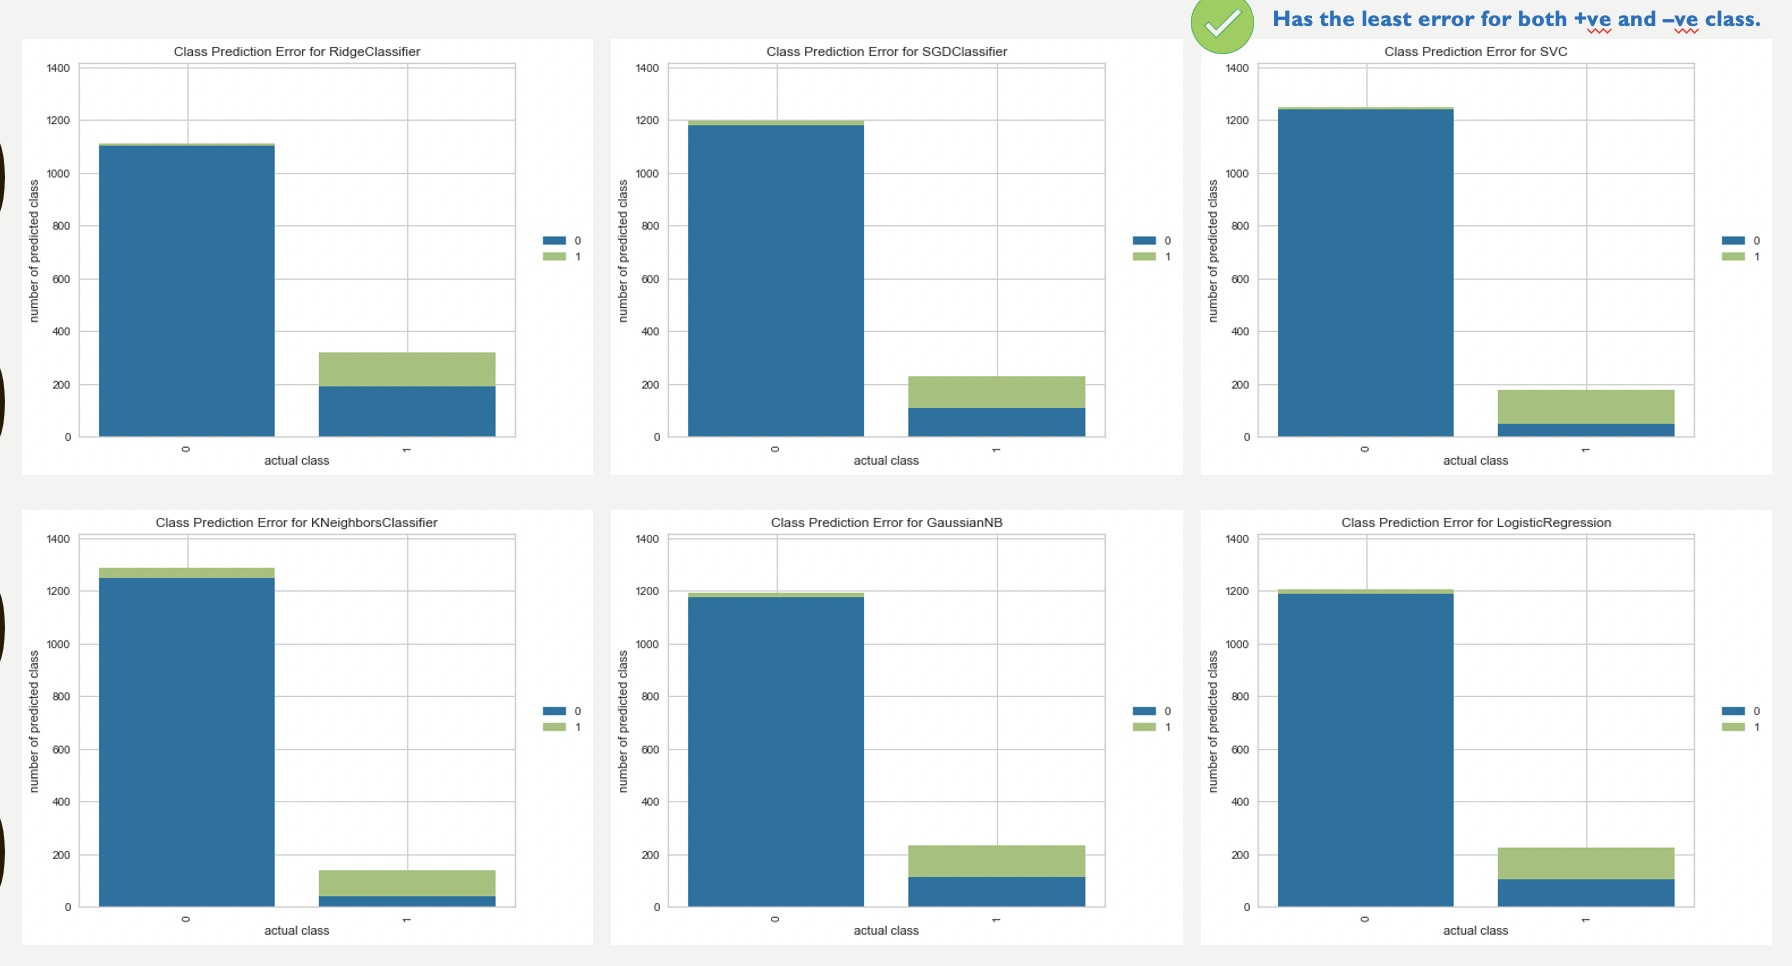

1. Both KNN and SVM-RBF have low error values for Class 1.
2. While the proportions of error seems to be identical for both KNN and SVM-RBF the overall true positives is higher for SVM-RBF.

### (f) Comparing Performance Metrics on *Unseen Data*

In [83]:
styles = [dict(selector="caption", 
               props=[("text-align", "center"),
                      ("font-size", "150%"),
                      ("color", 'black')])]  
final_score_df.style.bar(subset=['Recall','Accuracy','Precision','F1'], 
                         color=['#ffb399']).\
set_caption("Model Comparison").\
set_table_attributes("style='display:inline; font-size:110%' ").\
set_table_styles(styles)


,Model,Recall,Accuracy,Precision,F1
0,Ridge,0.200000,0.932000,0.800000,0.320000
1,SVM-Linear,0.650000,0.968000,0.928600,0.764700
2,SVM-RBF,0.950000,0.968000,0.730800,0.826100
3,KNN,0.450000,0.956000,1.000000,0.620700
4,Naive Bayes,0.550000,0.940000,0.647100,0.594600
5,Logistic Regression,0.900000,0.932000,0.545500,0.679200


### Observations:

1. We have used 6 classifier models as shown in the table above.
2. Recall is the most important criteria here as the marketing campaign is sensitive False Negatives.We do not want miss an opportunity to contact potential customers of personal loan.
3. Recall : It's highest for ***SVM-RBF at 95%*** closely followed by ***Logistic Regression at 90%***.
4. Accuracy : All models show high accuracy at ***+93%***.
5. Precision : ***KNN at 100%*** is the highest closely followed by ***SVM-Linear at 93%***.
6. F1: ***SVM-RBF at 83%*** is the highest closely followed by ***SVM-Linear at76.4%***.

     

###  Gain and Lift Chart

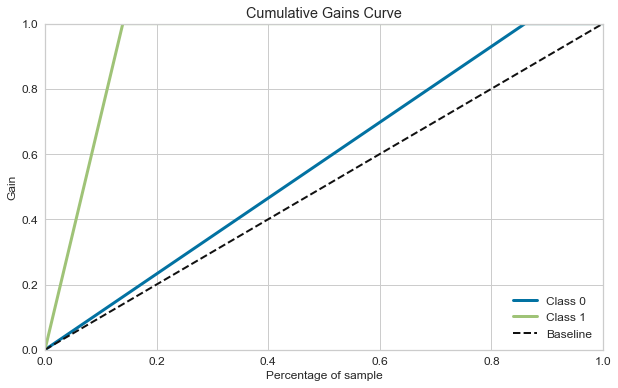

In [84]:
# Plotting Gain Chart for RBF-SVM
plot_model(final_rbfsvm,'gain')

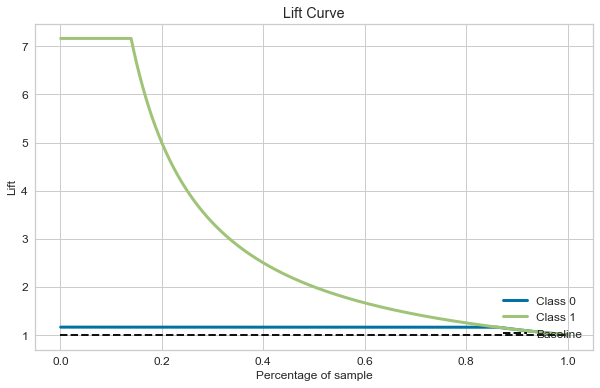

In [85]:
# Plotting Lift Chart for RBF-SVM
plot_model(final_rbfsvm,'lift')

#### Observations:
1. The Gain chart for the SVM-RBF model shows that we could get with 100% +ve response from 20% of the data set if this model is used against random choices.
2. The Lift chart for the SVM-RBF model shows that we could get 5-7 times more +ve response from 20% of the data if this model is used against random choices.

## Winner !!! Support Vector Machine-Radial Basis Function (SVM-RBF)
### Why ?
1. The SVM-RBF classifier has the highest average precision of 92%.This means that the SVM-RBF is 92% positive in identifying a potential loan customer when compared to other models.
2. SVM-RBF has the highest AUC of 98%. This means that the SVM-RBF will predict a +ve's with higher probability than the -ve's. Which exactly is required in this case.
3. SVM-RBF has a higher recall for both classes of prediction i.e Class0 and Class 1.
4. The class errors are comparitively low.
5. The Gain chart for the SVM-RBF model shows that we could get with 100% +ve response from 20% of the data set if this model is used against random choices.
6. The Lift chart for the SVM-RBF model shows that we could get 5-7 times more +ve response from 20% of the data if this model is used against random choices.

